## Traditional Similarity search methods

1. Jaccard = intersection(A,B) / union(A,B). For example, A = {1,2,3} and B = {2,4}, our resulkting Jaccard = 0.25
2. Levenshtein (similar to Jaccard but requires preprocessign for n-gram representation)

In [4]:
def jaccard(sentc_one: str, sentc_two: str):
    # Convert to sets
    sentc_one = set(sentc_one.split())
    sentc_two = set(sentc_two.split())
    # Calculate
    shared = sentc_one.intersection(sentc_two)
    union = sentc_one.union(sentc_two)
    return len(shared) / len(union)





In [12]:
jaccard('Paul is cool', 'Cool person forever Paul is coolest is coolest')

0.2857142857142857

## Sparse and Dense Representations

1. TF-IDF (Sparse)

Term Frequency = f(q, D) / f(t, D)

f(q, D) - Frequency of query q in Document D
f(t, D) - Count of all terms in Document D (N: total num terms)

Inverse Document Frequency or IDF = log (N / N(q='forest'))
It is calculate for each document

N is the total number of documents
N(q="forest") is number of documents containing the query forest

2. BM25 (Sparse)
3. SBERT (Dense)

In [18]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()


In [14]:
a

['purple', 'is', 'the', 'best', 'city', 'in', 'the', 'forest']

In [20]:
import numpy as np

# we'll merge all docs into a list of lists for easier calculation of IDF
docs = [a , b, c]
# print(docs)

def tfidf(word, sentence):
    # term frequency
    freq = sentence.count(word)
    tf = freq / len(sentence)
    
    # inverse document frequency
    idf = np.log10(len(docs) / sum([1 for doc in docs if word in doc]))

    # tf-idf
    tf_idf = round(tf*idf, 4)

    return tf_idf


In [22]:
tfidf('forest', a)

0.0596

In [23]:
# Create Document vectors
vocab = set(a+b+c)
vocab

{'an',
 'and',
 'art',
 'bananas',
 'best',
 'city',
 'find',
 'forest',
 'getting',
 'in',
 'is',
 'it',
 'not',
 'often',
 'on',
 'purple',
 'soggy',
 'street',
 'the',
 'there',
 'throwing',
 'to',
 'way',
 'you',
 'your'}

In [25]:
# Mirror our vocab as vector, for each document

vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    vec_a.append(tfidf(word, a))
    vec_b.append(tfidf(word, b))
    vec_c.append(tfidf(word, c))


In [26]:
vec_b

[0.0,
 0.0265,
 0.0265,
 0.053,
 0.0098,
 0.0,
 0.0265,
 0.0,
 0.0265,
 0.0,
 0.0265,
 0.0098,
 0.0,
 0.0,
 0.0098,
 0.0,
 0.0098,
 0.0,
 0.0098,
 0.0265,
 0.0,
 0.0,
 0.0,
 0.0265,
 0.0265]

## BM25
BM25 is an optimized version of TFIDF

One of the problems with the TFIDF method is that as the frequency of queries found in a document increase, the score increases linearly.

Imagine 1000 word article with word dog appearing 10 times = good chance article is talking about dog

Now if you double words that mention dog to 20, TFIDF will double as well. 

Logically that shouldnt be the case. That means that the original document with dog 10times is a document that is half as relevant to dogs as the article with dog 20 times. BM25 tries to normalize this exaggeration. 

In [3]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted rotten".split()
e = "joyce enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled".split()

In [5]:
import numpy as np

docs = [a, b, c, d, e, f]
N = len(docs) # Number of documents

# Recall tfidf
def tfidf(word, sentence):
    # term frequency
    freq = sentence.count(word)
    tf = freq / len(sentence)
    
    # inverse document frequency
    N_q = sum([1 for doc in docs if word in doc]) # Number of docs that contain the word  
    idf = np.log10(N / N_q)

    # tf-idf
    tf_idf = round(tf*idf, 4)

    return tf_idf



In [6]:
# Optimization new features
# 1. Average Document length (Sum of All len(sent) across docs / N)
avgdl = sum(len(sentence) for sentence in docs) / N 

# 2. k and b - Adjustable parameters that control ...


In [7]:
N = len(docs) # Number of documents
#bm25 implementation
def bm25(word, sentence, k=1.2, b=0.75):
    # term frequency
    freq = sentence.count(word) 
    
    tf = (freq * (k + 1)) / (freq + k * (1 - b + b * len(sentence) / avgdl))

    # inverse document frequency
    N_q = sum([1 for doc in docs if word in doc]) # Number of docs that contain the word    
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)

    return round(tf*idf, 4)
    

In [9]:
bm25('purple', a)

1.7677

### Comparing TF-IDF and BM25 algorithms
The TF-IDF score increases linearly with the frequency for the matching term 

The BM25 algorithm increases logarithmically.

In most cases BM25 is more realistic.

In [56]:
# Load CSV to Pandas DF
import pandas as pd
# reading source system information
source_fields = pd.read_csv('data-main/source_info.csv')
source_fields

,SourceField,Description
0,ASSOC,Displays or modifies file extension associations.
1,ATTRIB,Displays or changes file attributes.
2,BREAK,Sets or clears extended CTRL+C checking.
3,BCDEDIT,Sets properties in boot database to control bo...
4,CACLS,Displays or modifies access control lists (ACL...
...,...,...
79,VER,Displays the Windows version.
80,VERIFY,Tells Windows whether to verify that your file...
81,VOL,Displays a disk volume label and serial number.
82,XCOPY,Copies files and directory trees.


In [67]:
sf_desc_list = [sf_desc for sf_desc in source_fields['Description']]    

In [68]:
sf_desc_list

['Displays or modifies file extension associations.',
 'Displays or changes file attributes.',
 'Sets or clears extended CTRL+C checking.',
 'Sets properties in boot database to control boot loading.',
 'Displays or modifies access control lists (ACLs) of files.',
 'Calls one batch program from another.',
 'Displays the name of or changes the current directory.',
 'Displays or sets the active code page number.',
 'Displays the name of or changes the current directory.',
 'Checks a disk and displays a status report.',
 'Displays or modifies the checking of disk at boot time.',
 'Clears the screen.',
 'Starts a new instance of the Windows command interpreter.',
 'Sets the default console foreground and background colors.',
 'Compares the contents of two files or sets of files.',
 'Displays or alters the compression of files on NTFS partitions.',
 'Converts FAT volumes to NTFS.  You cannot convert the',
 'Copies one or more files to another location.',
 'Displays or sets the date.',
 'Del

## (Dense vectors): Sentence embeddings with Siamese BERT-Networks (SBERT)
The effect of using dense vectors is that it lets you represent words in a more meaningful manner

For example words like hi == hello in their vector similarity, and so would days of the week.

In this case, we have a transformer model (BERT) and our queries (q) and documents (D) are processed by many (and the same) BERT encoding layers (encoder network). Consequently, what we get as output are Dense vectors.

Similarity between query and Document can be calculated using cosine similarity. The smaller angle between 2 vectors. Where the angle is smaller they are more similar, where the angle is larger they are dissimilar.

We will use a SentenceTransformers library that uses Hugging Face Transformers under the hood. 

In [14]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"

In [60]:
[a, b, c, d, e, f, g]

['purple is the best city in the forest',
 'there is an art to getting your way and throwing bananas on to the street is not it',
 'it is not often you find soggy bananas on the street',
 'green should have smelled more tranquil but somehow it just tasted rotten',
 'joyce enjoyed eating pancakes with ketchup',
 'as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled',
 'to get your way you must not bombard the road with yellow fruit']

Usually while approaching any NLP problem we tend to follow this process:
- Lower casing the corpus
- Removing the punctuation 
- Removing the stopwords 
- Tokenizing the corpus 
- Stemming and Lemmatization
- Word embeddings using CountVectorizer and TF-IDF 

and the above process does not ensure any reasonable result if our raw data changes slightly. This means if the data is from a web page there we need additional work to remove HTML tags. Nowadays all these pre-processing steps can be carried out by using transfer learning modules like BERT.

## Bidirectional Encoder Representations from Transformers (BERT)
In order to pretrain BRs from unlabeled text, the algorithm uses context conditioning on
both the left and right sides of the sentence. Consequently, pretrained BERT model could also be fine tuned by adding one more output layer to produce cutting edge models for a wide variety of NLP tasks. [Article Here](https://analyticsindiamag.com/a-guide-to-text-preprocessing-using-bert/)

In [69]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens') # sentence bert

sentence_embeddings = model.encode(sf_desc_list)

In [72]:
sentence_embeddings.shape # (row, col), where col is the size of a single embedding vector
# sentence_embeddings

(84, 768)

In [73]:
N = sentence_embeddings.shape[0] # num of docs

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# calculate similarity scores (will store results in array)

scores = np.zeros((N, N)) # np array of N by N because we want to evaluate each document with one another
for i in range(N):
    scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

In [86]:
for i in range(84):
    if i == 0:
        sen0_v_all = [scores[0][i]]
    else:
        sen0_v_all.append(scores[0][i])


In [87]:
sen0_v_all

[1.0000001192092896,
 0.9012500047683716,
 0.7092053890228271,
 0.6307066679000854,
 0.8808245658874512,
 0.6534117460250854,
 0.7399052381515503,
 0.7191073894500732,
 0.7399051189422607,
 0.7004543542861938,
 0.6372323036193848,
 0.621161699295044,
 0.5399917364120483,
 0.6056424975395203,
 0.74901282787323,
 0.7343857288360596,
 0.28442060947418213,
 0.6982022523880005,
 0.5181936025619507,
 0.7183984518051147,
 0.7485365867614746,
 0.756490170955658,
 0.6980089545249939,
 0.6845988631248474,
 0.6020758152008057,
 0.5519631505012512,
 0.7183984518051147,
 0.4006621837615967,
 0.6818743944168091,
 0.7215089797973633,
 0.7615868449211121,
 0.7492485642433167,
 0.6640137434005737,
 0.8983699679374695,
 0.9722380638122559,
 0.6326125264167786,
 0.7145655751228333,
 0.6770948171615601,
 0.7025939226150513,
 0.820559561252594,
 0.62693852186203,
 0.7329206466674805,
 0.7430578470230103,
 0.7430575489997864,
 0.574332594871521,
 0.7171331644058228,
 0.5006169080734253,
 0.748000979423523,


In [77]:
sf_list = [f for f in source_fields['SourceField']]

In [78]:
sf_list

['ASSOC',
 'ATTRIB',
 'BREAK',
 'BCDEDIT',
 'CACLS',
 'CALL',
 'CD',
 'CHCP',
 'CHDIR',
 'CHKDSK',
 'CHKNTFS',
 'CLS',
 'CMD',
 'COLOR',
 'COMP',
 'COMPACT',
 'CONVERT',
 'COPY',
 'DATE',
 'DEL',
 'DIR',
 'DISKPART',
 'DOSKEY',
 'DRIVERQUERY',
 'ECHO',
 'ENDLOCAL',
 'ERASE',
 'EXIT',
 'FC',
 'FIND',
 'FINDSTR',
 'FOR',
 'FORMAT',
 'FSUTIL',
 'FTYPE',
 'GOTO',
 'GPRESULT',
 'GRAFTABL',
 'HELP',
 'ICACLS',
 'IF',
 'LABEL',
 'MD',
 'MKDIR',
 'MKLINK',
 'MODE',
 'MORE',
 'MOVE',
 'OPENFILES',
 'PATH',
 'PAUSE',
 'POPD',
 'PRINT',
 'PROMPT',
 'PUSHD',
 'RD',
 'RECOVER',
 'REM',
 'REN',
 'RENAME',
 'REPLACE',
 'RMDIR',
 'ROBOCOPY',
 'SET',
 'SETLOCAL',
 'SC',
 'SCHTASKS',
 'SHIFT',
 'SHUTDOWN',
 'SORT',
 'START',
 'SUBST',
 'SYSTEMINFO',
 'TASKLIST',
 'TASKKILL',
 'TIME',
 'TITLE',
 'TREE',
 'TYPE',
 'VER',
 'VERIFY',
 'VOL',
 'XCOPY',
 'WMIC']

<AxesSubplot:>

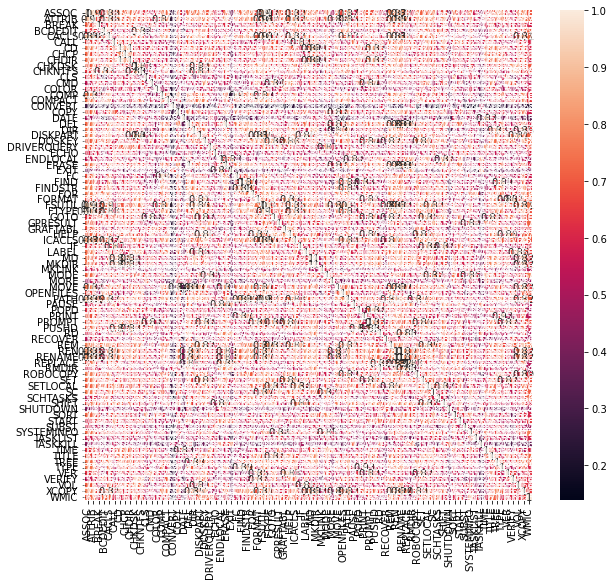

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
labels = sf_list
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)

# Facebook AI Similarity Search (FAISS)

Library from Facebook AI allows users to compare vectors with high efficiency.

Building sentence and comparing sentence embeddings with python loops as above is slow. Feasible for ~ 100 vectors. 

FAISS can scale to billions of vectors. 

FAISS also supports optimizations to restrict search perimeter for candidates in our vector space.


For this demonstration we will download and use embeddings (as numpy binary files) from [this repository](https://github.com/jamescalam/data) because they do take a while to process and build.



In [43]:
# Load embeddings from numpy binaries
for i in range(57):
    if i == 0:
        with open(f'data-main/sentence_embeddings_15K/embeddings_{i}.npy', 'rb') as fp:
            sentence_embeddings = np.load(fp)
    else:
        with open(f'data-main/sentence_embeddings_15K/embeddings_{i}.npy', 'rb') as fp:
            sentence_embeddings = np.append(sentence_embeddings, np.load(fp), axis=0) # append vertically, along rows


In [44]:
sentence_embeddings.shape # 14504 sentences embeded to a dense vector with 768 values

(14504, 768)

In [49]:
with open(file='data-main/sentence_embeddings_15K/sentences.txt', mode='r', encoding='utf8') as fp:
    lines = fp.read().split('\n')

In [50]:
lines[:5]

['A group of four children dancing in a backyard.',
 'The Conference Board said its measure of business confidence, which had fallen to 53 in the first quarter of 2003, improved to 60 in the most recent second quarter.',
 'a person eating a meal, often in a restaurant',
 'When you crossed the line, you violated the constitutional right," said Charles Weisselberg, who teaches law at the University of California, Berkeley.',
 "Ross Garber, Rowland's legal counsel, said the governor would have no comment on the condo deal."]

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')


In [51]:
model.encode(['hello world'])

array([[-1.50538653e-01,  5.29023521e-02,  2.08420134e+00,
         1.41297400e-01,  4.38930273e-01,  1.24937147e-01,
         3.32377195e-01,  1.05838180e+00,  6.03576750e-03,
        -8.61334130e-02, -9.99486566e-01,  3.18820864e-01,
        -4.51275147e-03,  5.95006168e-01,  7.58371472e-01,
         1.64415121e-01, -8.48956764e-01, -9.83350798e-02,
        -6.95175976e-02, -3.47868562e-01, -8.61892700e-01,
        -8.10270384e-02, -3.24416250e-01, -1.15120053e+00,
         9.96497497e-02, -7.85229385e-01,  4.35979903e-01,
        -1.60889256e+00, -2.26758316e-01,  9.49697718e-02,
        -4.74192977e-01, -3.08339655e-01,  1.11107039e+00,
        -2.29384363e-01, -5.38671315e-01,  8.46415341e-01,
        -9.40801382e-01,  1.99518457e-01, -2.74196863e-01,
        -1.69324040e-01,  1.96000791e+00, -3.42637241e-01,
         1.46522021e+00,  3.53447139e-01, -9.44687724e-01,
        -3.38534683e-01, -2.87146658e-01,  5.31773210e-01,
        -8.19032788e-02, -1.20050538e+00, -6.74837470e-0

In [52]:
vec_dim = sentence_embeddings.shape[1] # Dimesnionality of each vector
vec_dim

768

In [55]:
!pip install faiss


ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss
You should consider upgrading via the 'c:\users\paul.owe\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [53]:
# IndexFlatL2 - all vectors are Flat, no transformations. 
# L2 is distance metric to measure similarity (Euclidean)

import faiss
index = faiss.IndexFlatL2(vec_dim)

ModuleNotFoundError: No module named 'faiss'